## Plotting and Visualization

#### Matplotlib is a Python library for publication-quality 2D and 3D graphics, with support for a variety of different output formats.

### Importing modules:

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np

Graph the function $y = x^{3} + 5x^{2} + 10$ , together with its
first and second derivatives, over the range $x \in [-5, 2]$:

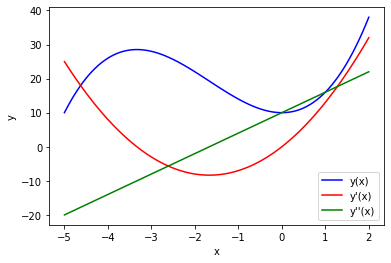

In [2]:
# Example_01

x = np.linspace(-5, 2, 100)
y1 = x**3 + 5*x**2 + 10
y2 = 3*x**2 + 10*x
y3 = 6*x + 10

fig, ax = plt.subplots()
ax.plot(x, y1, color="blue", label="y(x)")
ax.plot(x, y2, color="red", label="y'(x)")
ax.plot(x, y3, color="green", label="y''(x)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

### Interactive and Non-Interactive Modes:
**Selecting the Qt4Agg backend:**

In [3]:
# import matplotlib as mpl
# mpl.use("qt4agg")
# import matplotlib.pyplot as plt

### Figure:

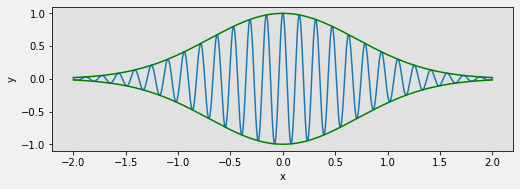

In [4]:
# Example_02

fig = plt.figure(figsize=(8, 2.5), facecolor="#f1f1f1")

# axes coordinates as fractions of the canvas width and height
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes(
    (left, bottom, width, height),
    facecolor="#e1e1e1"
)

x = np.linspace(-2, 2, 1000)
y1 = np.cos(40 * x)
y2 = np.exp(-x**2)

ax.plot(x, y1 * y2)
ax.plot(x, y2, 'g')
ax.plot(x, -y2, 'g')
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.savefig(
    "graph.png",
    dpi=100,
    facecolor="#f1f1f1"
)

### Plot Types:

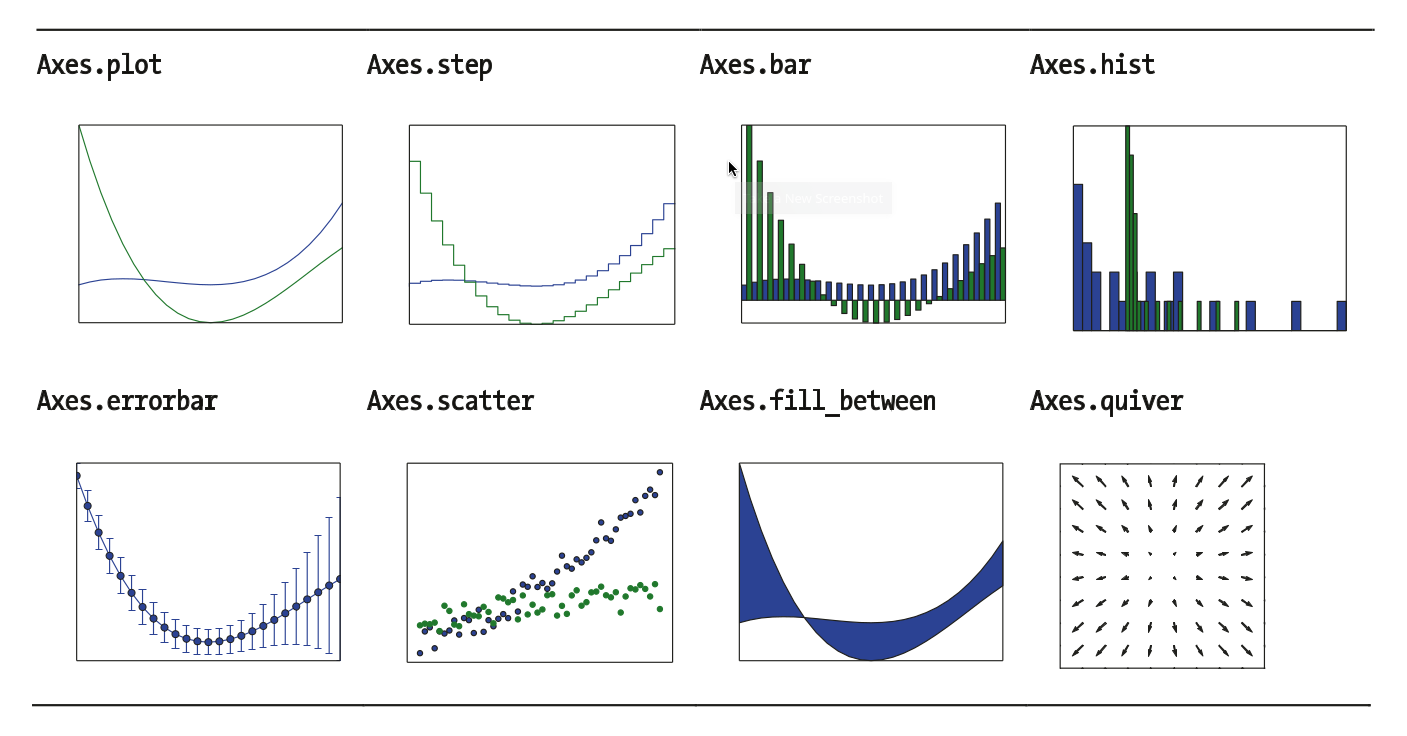

In [5]:
from IPython.display import Image
Image("../img/plot_types.png")

### Line Properties:

ValueError: '+' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

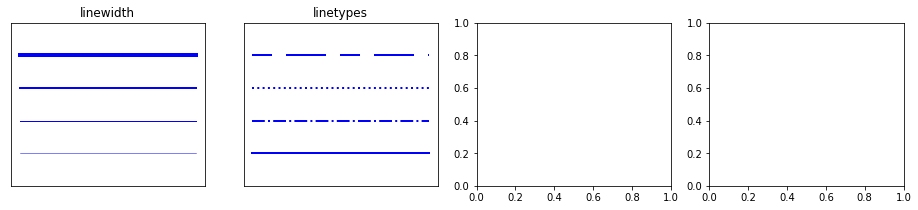

In [16]:
# Example_03

x = np.linspace(-5, 5, 5)
y = np.ones_like(x)

def axes_settings(fig, ax, title, ymax):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim(0, ymax+1)
    ax.set_title(title)

fig, axes = plt.subplots(1, 4, figsize=(16,3))

# line width
linewidths = [0.5, 1.0, 2.0, 4.0]
for n, linewidth in enumerate(linewidths):
    axes[0].plot(x, y + n, color="blue", linewidth=linewidth)
axes_settings(fig, axes[0], "linewidth", len(linewidths))

# line style
linestyles = ['-', '-.', ':']
for n, linestyle in enumerate(linestyles):
    axes[1].plot(x, y + n, color="blue", lw=2, linestyle=linestyle)

# custom dash style
line, = axes[1].plot(x, y + 3, color="blue", lw=2)
length1, gap1, length2, gap2 = 10, 7, 20, 7
line.set_dashes([length1, gap1, length2, gap2])
axes_settings(fig, axes[1], "linetypes", len(linestyles) + 1)

# marker types
markers = ['+', 'o', '*', 's', '.', '1', '2', '3', '4']
for n, marker in enumerate(markers):
    axes[2].plot(x, y + n, color="blue", lw=2, ls='', marker=marker)
axes_settings(fig, axes[2], "markers", len(markers))